In [3]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.feature_extraction.text import TfidfVectorizer

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

# 1.1 Describe the dataset

### Load the dataset using pd.read_csv 

In [4]:
df = pd.read_csv('data.csv')

/var/folders/lj/hjx_f2t15pb933d12v5ygp7r0000gn/T/ipykernel_15572/1507164070.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


### 1.1.1 Visualize the head of dataset to describe its properties.

In [5]:
df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,38564891,Program Manager - Trade Reporting,Talenza,2019-03-13T00:00:00.000Z,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN
318473,38564940,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13T00:00:00.000Z,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN
318474,38552964,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12T00:00:00.000Z,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN
318475,38534438,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08T00:00:00.000Z,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN


### 1.1.2 How many records are in the dataset? 

In [6]:
num_records = df.shape[0]

In [7]:
print(f'In this data set there are {num_records} records.')

In this data set there are 318477 records.


### 1.1.3 Time frame of dataset

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
period_start = df['Date'].min()
period_end = df['Date'].max()

# Find the number of unique dates with job postings
unique_dates_count = df['Date'].nunique()

print(f'The dataset covers the period from {period_start.date()} to {period_end.date()}.')
print(f'There are {unique_dates_count} different dates with job postings.')

The dataset covers the period from 2018-10-01 to 2019-03-13.
There are 163 different dates with job postings.


### 1.1.4 How many locations are in the record, and which location appears the most

In [48]:
unq_locationscount = df['Location'].nunique()

locationcounts = df['Location'].value_counts()
job_postings_location = locationcounts.idxmax()
job_postings_count = locationcounts.max()

print(f'The dataset has {unq_locationscount} unique locations.')
print(f'The location with the most job postings is {job_postings_location} with {job_postings_count} postings.')

The dataset has 65 unique locations.
The location with the most job postings is Sydney with 60765 postings.


### 1.1.5 How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings.

In [9]:

uniqueclassifications = df['Classification'].nunique()

classificationcounts = df['Classification'].value_counts()

print(f'The dataset has {uniqueclassifications} unique job classifications.')


classificationcountsdf = classificationcounts.reset_index()
classificationcountsdf.columns = ['Job Classification', 'Total Job Postings']

print("Job Classification and their total job postings:")
print(classificationcountsdf)

The dataset has 30 unique job classifications.
Job Classification and their total job postings:
                        Job Classification  Total Job Postings
0   Information & Communication Technology               22796
1                        Trades & Services               17976
2                     Healthcare & Medical               17085
3                    Hospitality & Tourism               15523
4     Manufacturing, Transport & Logistics               12376
5          Administration & Office Support               10020
6                               Accounting                9368
7                     Education & Training                9280
8                             Construction                8372
9                                    Sales                8119
10              Retail & Consumer Products                8041
11                    Government & Defence                7443
12                             Engineering                6458
13              Mining

### 1.1.6 In the ICT sector, how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number.

In [61]:
itjobs_df = df[df['Classification'] == 'Information & Communication Technology']

subsectorsunique = itjobs_df['SubClassification'].nunique()

subsectorscount = itjobs_df['SubClassification'].value_counts()

print(f'There are {subsectorsunique} unique sub-sectors in the "Information & Communication Technology" sector.')

subsectorscountdf = subsectorscount.reset_index()
subsectorscountdf.columns = ['Sub-Sector', 'Total Job Postings']

print("Sub-Sector and their total job postings:")
print(subsectorscountdf)

There are 22 unique sub-sectors in the "Information & Communication Technology" sector.
Sub-Sector and their total job postings:
                               Sub-Sector  Total Job Postings
0                  Developers/Programmers                4211
1               Business/Systems Analysts                2986
2          Programme & Project Management                2413
3                              Architects                1548
4                  Engineering - Software                1437
5                  Help Desk & IT Support                1374
6       Networks & Systems Administration                1194
7                             Consultants                1149
8                                   Other                 997
9             Testing & Quality Assurance                 831
10                               Security                 774
11                             Management                 746
12                  Engineering - Network                 552
13 

### 1.1.7 List the job types. In each job type, what are the lowest salary and highest salary?

In [11]:
job_type_salaries = df.groupby('JobType').agg(
    LowestSalary=('LowestSalary', 'min'),
    HighestSalary=('HighestSalary', 'max')
).reset_index()

print("Job types and their salary ranges:")
print(job_type_salaries)

Job types and their salary ranges:
           JobType  LowestSalary  HighestSalary
0  Casual/Vacation             0            999
1    Contract/Temp             0            999
2        Full Time             0            999
3        Part Time             0            999


# 1.2.Normalize and clean the data.

### 1.2.1 Calculate the avarage salary using df.assign.

In [12]:
df = df.assign(Average_Salary=(df['HighestSalary'] + df['LowestSalary']) / 2)

In [13]:
df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Average_Salary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,38564891,Program Manager - Trade Reporting,Talenza,2019-03-13 00:00:00+00:00,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN,599.5
318473,38564940,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13 00:00:00+00:00,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN,599.5
318474,38552964,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12 00:00:00+00:00,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN,599.5
318475,38534438,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08 00:00:00+00:00,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN,599.5


### 1.2.2 Clean Id column using regex.

In [14]:
df['Id'] = df['Id'].replace(to_replace=r'&.*', value='', regex=True)

### 1.2.3 Clean date using regex.

In [15]:

df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)

In [16]:
df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Average_Salary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,38564891,Program Manager - Trade Reporting,Talenza,2019-03-13 00:00:00+00:00,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN,599.5
318473,38564940,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13 00:00:00+00:00,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN,599.5
318474,38552964,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12 00:00:00+00:00,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN,599.5
318475,38534438,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08 00:00:00+00:00,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN,599.5


### 1.2.4 Change type of related columns.

In [17]:
#type of 'Id' to int64
df["Id"] = df["Id"].astype('int64')

#type of 'Date' to datetime64
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

print(df.dtypes)


Id                                 int64
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
Requirement                       object
FullDescription                   object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
Average_Salary                   float64
dtype: object


### 1.2.5 Are there any duplicate data in the dataset? Provide the way you find them and your /solution to fix it. 

In [64]:
duplicate_rows = df[df.duplicated()]

print("Duplicate rows in the dataset:")
print(duplicate_rows)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify if duplicates are removed
print("\nDataFrame after removing duplicates:")
print(df_cleaned)

Duplicate rows in the dataset:
Empty DataFrame
Columns: [Id, Title, Company, Date, Location, Area, Classification, SubClassification, Requirement, FullDescription, LowestSalary, HighestSalary, JobType]
Index: []

DataFrame after removing duplicates:
              Id                                              Title  \
0       37404348                           Casual Stock Replenisher   
1       37404337                           Casual Stock Replenisher   
2       37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3       37404330                              Team member - Belrose   
4       37404308  Business Banking Contact Centre Specialist, Ni...   
...          ...                                                ...   
318472  38564891                  Program Manager - Trade Reporting   
318473  38564940            Web Content Writer - June 2019 contract   
318474  38552964              Brand Director - Global Premium Brand   
318475  38534438   Head of Financial Pla

### 1.2.6 Check missing data and visualize them in a corresponding chart.

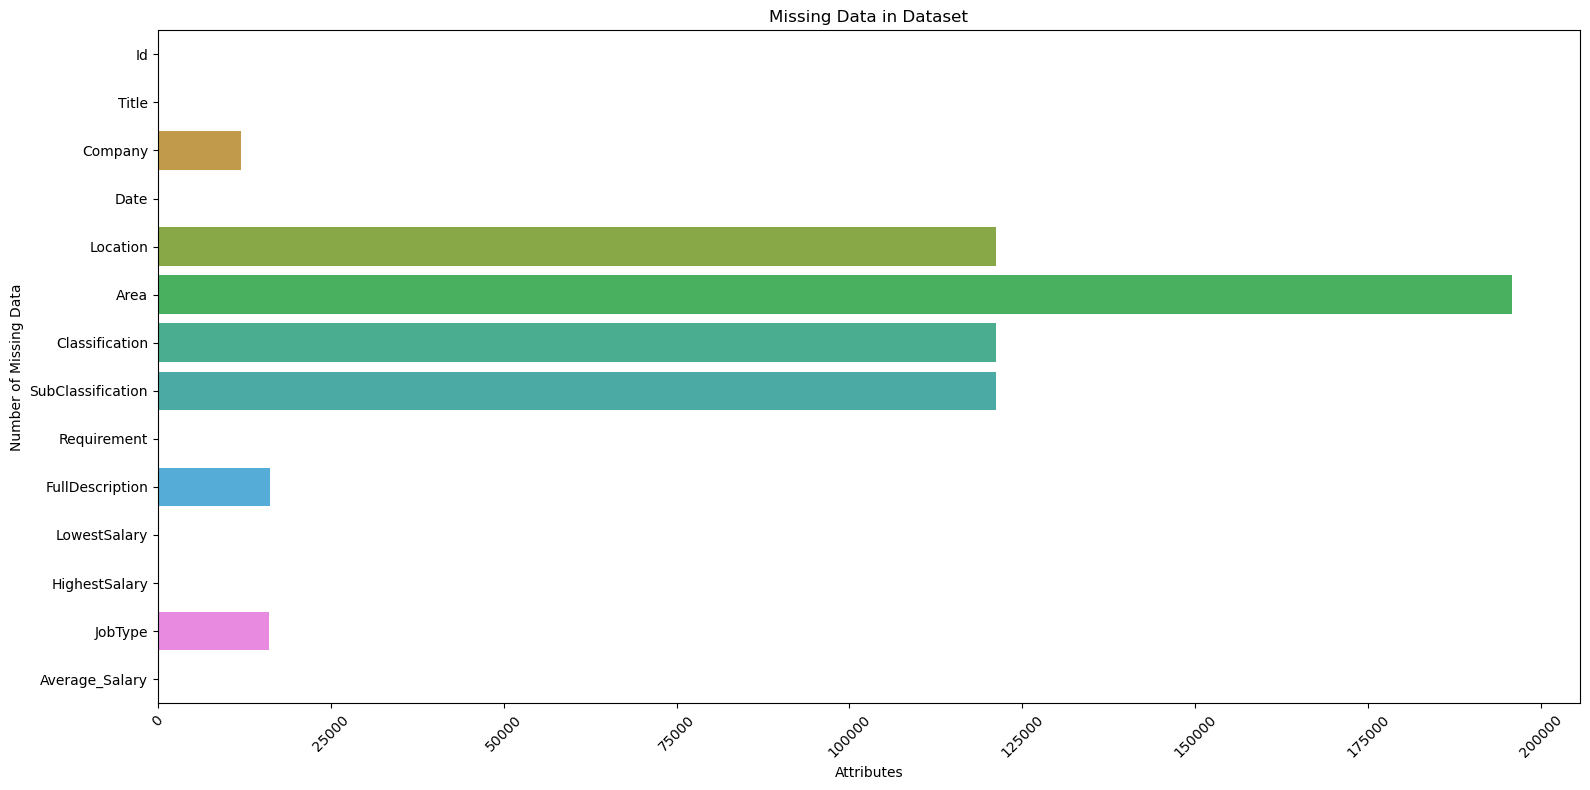

In [19]:
missing_data = df.isnull().sum()


missing_data_df = pd.DataFrame({'Attribute': missing_data.index, 'Missing Data': missing_data.values})


plt.figure(figsize=(16, 8))
sns.barplot(x='Missing Data', y='Attribute', data=missing_data_df)
plt.title('Missing Data in Dataset')
plt.xlabel('Attributes')
plt.ylabel('Number of Missing Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# Part 2

### 2.1

In [21]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [22]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('Average_Salary').count()
averageSalaryDf['Average_Salary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Average_Salary,Count
Average_Salary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,"135,000",24514


### 2.1 Bar chart to display the correlations between “AverageSalary” and the total jobs of each range (2 marks)

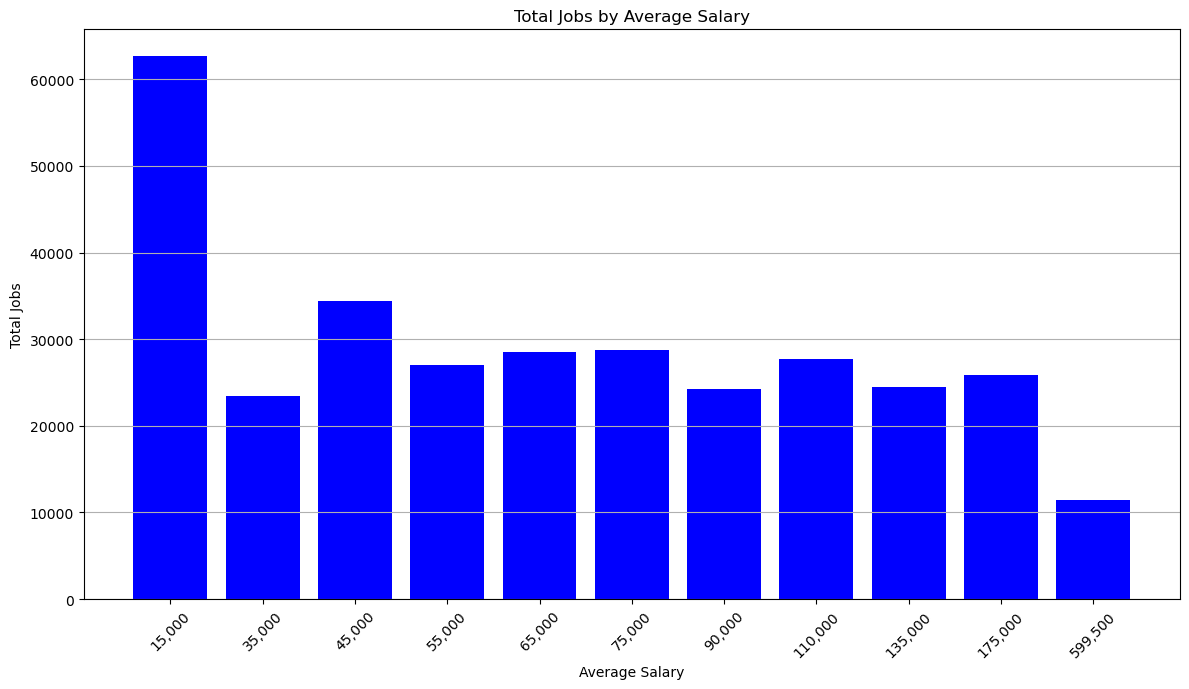

In [23]:

plt.figure(figsize=(12, 7))
plt.bar(averageSalaryDf['Average_Salary'], averageSalaryDf['Count'], color='blue', alpha=1)
plt.xlabel('Average Salary')
plt.ylabel('Total Jobs')
plt.title('Total Jobs by Average Salary')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=1)
plt.tight_layout()
plt.show()

### 2.2 Pie chart to display the relationship between job types and the number of jobs (2 marks).

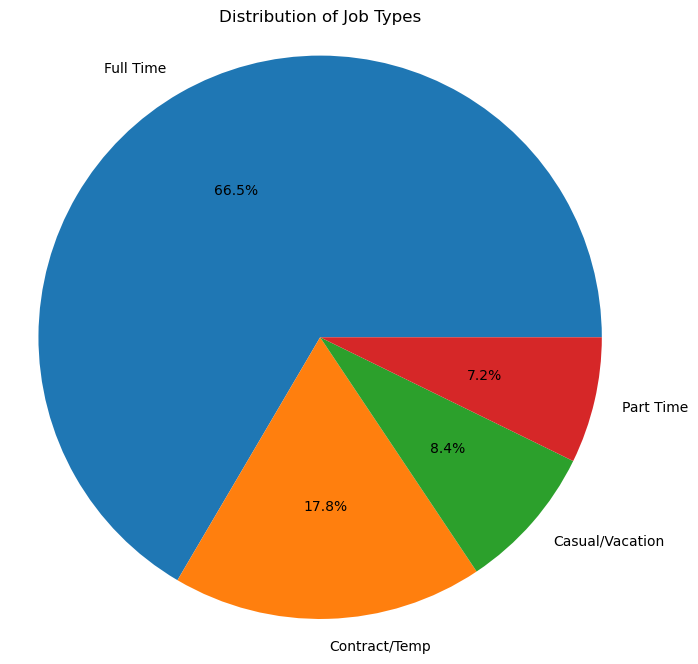

In [24]:
jobtype_counts = df['JobType'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(jobtype_counts, labels=jobtype_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Job Types')
plt.axis('equal')  
plt.show()

### 2.3 Display the list of job sectors and the number of jobs of each type using horizontal bar chart.


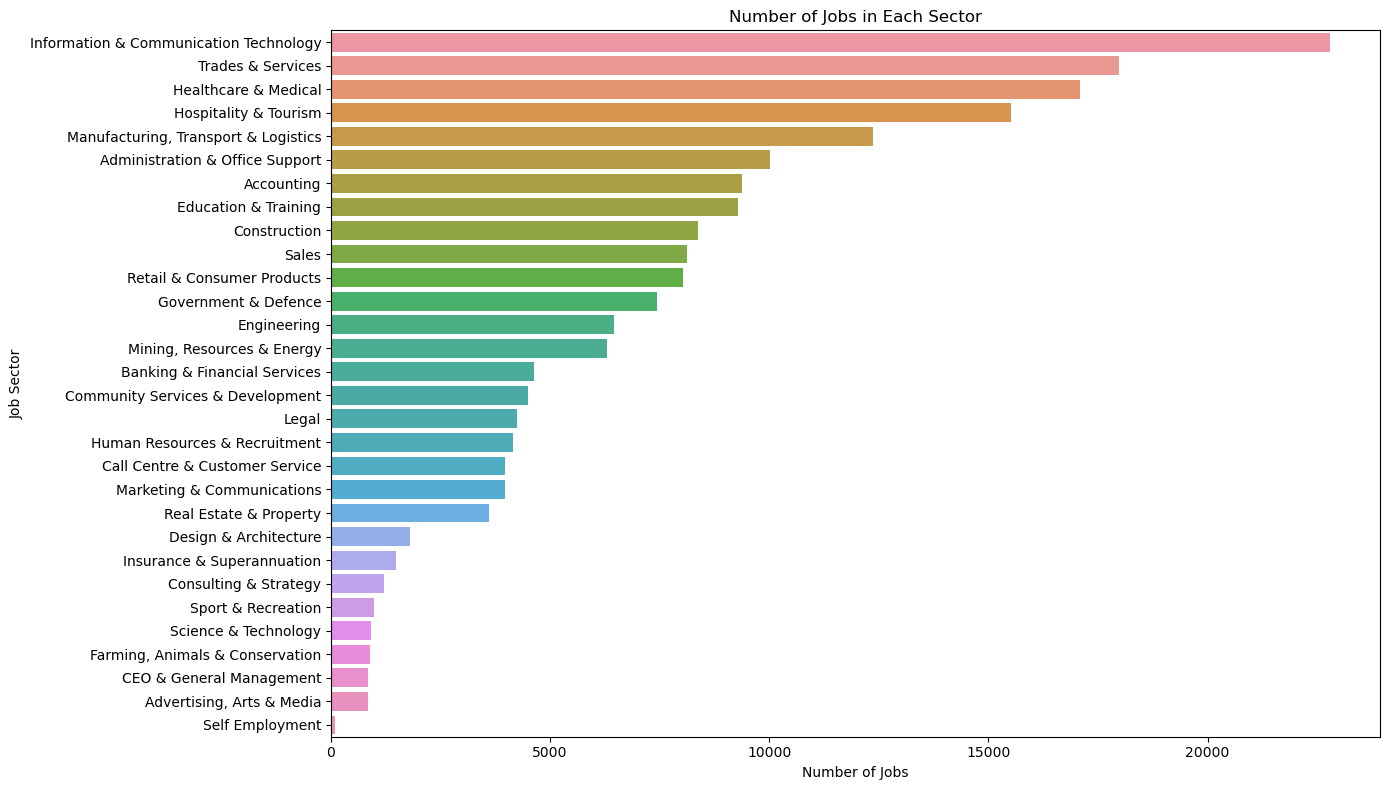

In [25]:
job_sectors = df['Classification'].value_counts()


plt.figure(figsize=(14, 8))
sns.barplot(x=job_sectors.values, y=job_sectors.index)
plt.title('Number of Jobs in Each Sector')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Sector')
plt.tight_layout()
plt.show()

### 2.4 Visualize the Market Share of a Chosen Location in a Pie Chart.

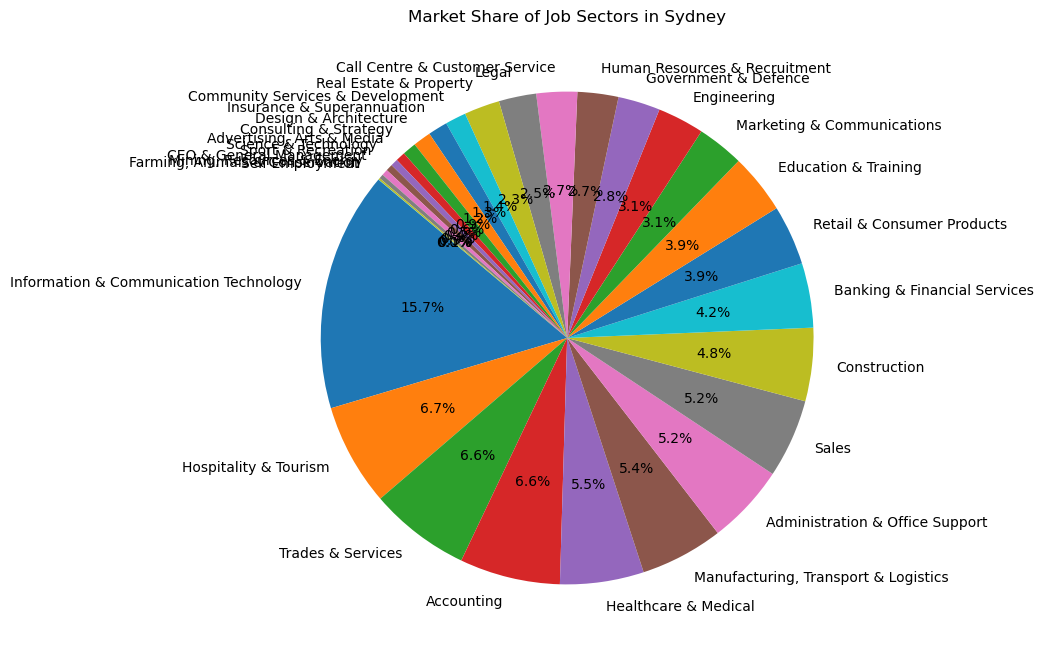

In [26]:
chosen_location = 'Sydney'

# Filter the DataFrame for the chosen location
location_df = df[df['Location'] == chosen_location]

# Group by Classification and count the number of jobs in each sector for the chosen location
sector_counts = location_df['Classification'].value_counts()

# Plotting the pie chart for job sectors in the chosen location
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Market Share of Job Sectors in {chosen_location}')
plt.show()

### 2.5 Salary distribution for the top 30 cities for the number of job posting in a boxplot chart.

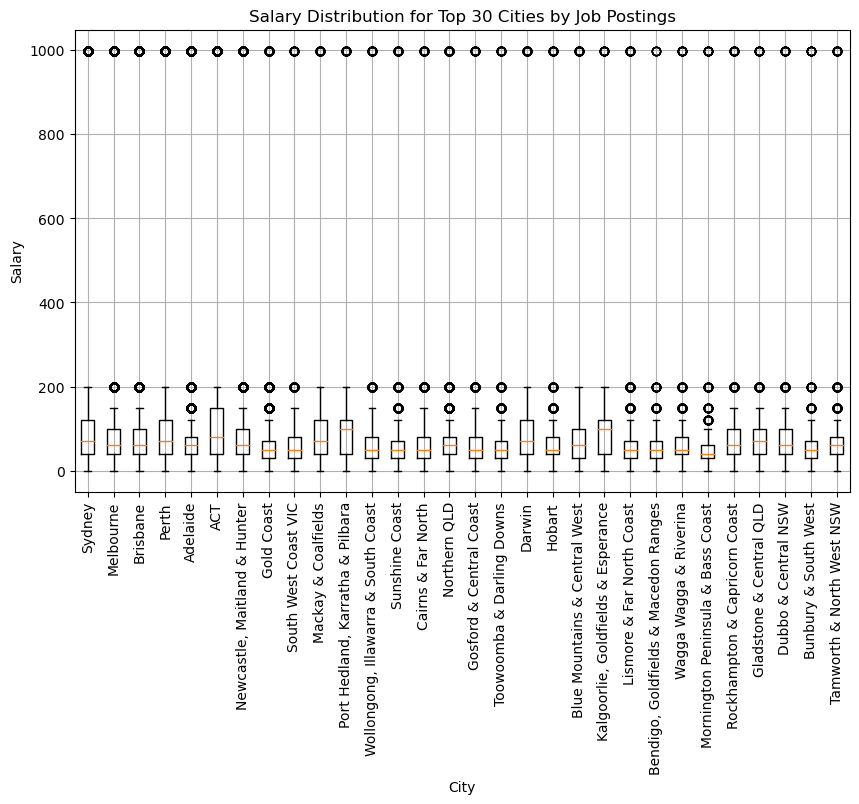

In [27]:

top_cities = df['Location'].value_counts().head(30).index

top_cities_df = df[df['Location'].isin(top_cities)]


salary_data = []

for city in top_cities:
    city_salary_data = top_cities_df[top_cities_df['Location'] == city][['LowestSalary', 'HighestSalary']]
    salary_data.append(city_salary_data.values.flatten())

plt.figure(figsize=(10, 6))
plt.boxplot(salary_data)
plt.xticks(range(1, len(top_cities) + 1), top_cities, rotation=90)
plt.xlabel('City')
plt.ylabel('Salary')
plt.title('Salary Distribution for Top 30 Cities by Job Postings')
plt.grid(True)
plt.show()

## Part 3 - Data Analysis and Visualization 

## 3.1 Analysis by Comparison (Sydney and Brisbane)

### 3.1.1 Which city has more job? How many jobs each type (casual, fulltime, etc.) are therein each city?

In [28]:
sydney_df = df[df['Location'] == 'Sydney']
brisbane_df = df[df['Location'] == 'Brisbane']


sydney_job_counts = sydney_df['JobType'].value_counts()


brisbane_job_counts = brisbane_df['JobType'].value_counts()


if len(sydney_df) > len(brisbane_df):
    more_jobs_city = 'Sydney'
    fewer_jobs_city = 'Brisbane'
    more_jobs_count = len(sydney_df)
    fewer_jobs_count = len(brisbane_df)
else:
    more_jobs_city = 'Brisbane'
    fewer_jobs_city = 'Sydney'
    more_jobs_count = len(brisbane_df)
    fewer_jobs_count = len(sydney_df)


print(f"{more_jobs_city} has more jobs with {more_jobs_count} jobs.")
print(f"Number of jobs in each type in {more_jobs_city}:")
print(sydney_job_counts)
print(f"Number of jobs in each type in {fewer_jobs_city}:")
print(brisbane_job_counts)

Sydney has more jobs with 60765 jobs.
Number of jobs in each type in Sydney:
Full Time          40607
Contract/Temp      10995
Casual/Vacation     3017
Part Time           2851
Name: JobType, dtype: int64
Number of jobs in each type in Brisbane:
Full Time          13004
Contract/Temp       4115
Casual/Vacation     1886
Part Time           1216
Name: JobType, dtype: int64


### 3.1.2 Top 5 job sectors for each city and how many jobs are there in each sector?

In [29]:
sydney_sector_counts = sydney_df['Classification'].value_counts().head(5)
brisbane_sector_counts = brisbane_df['Classification'].value_counts().head(5)


print("Top 5 job sectors in Sydney:")
print(sydney_sector_counts)
print("\nTop 5 job sectors in Brisbane:")
print(brisbane_sector_counts)

Top 5 job sectors in Sydney:
Information & Communication Technology    9548
Hospitality & Tourism                     4074
Trades & Services                         4026
Accounting                                4010
Healthcare & Medical                      3339
Name: Classification, dtype: int64

Top 5 job sectors in Brisbane:
Information & Communication Technology    2768
Trades & Services                         1993
Healthcare & Medical                      1824
Manufacturing, Transport & Logistics      1667
Hospitality & Tourism                     1335
Name: Classification, dtype: int64


### 3.1.3 Visualise the top 5 job sectors in pie chart for each city.

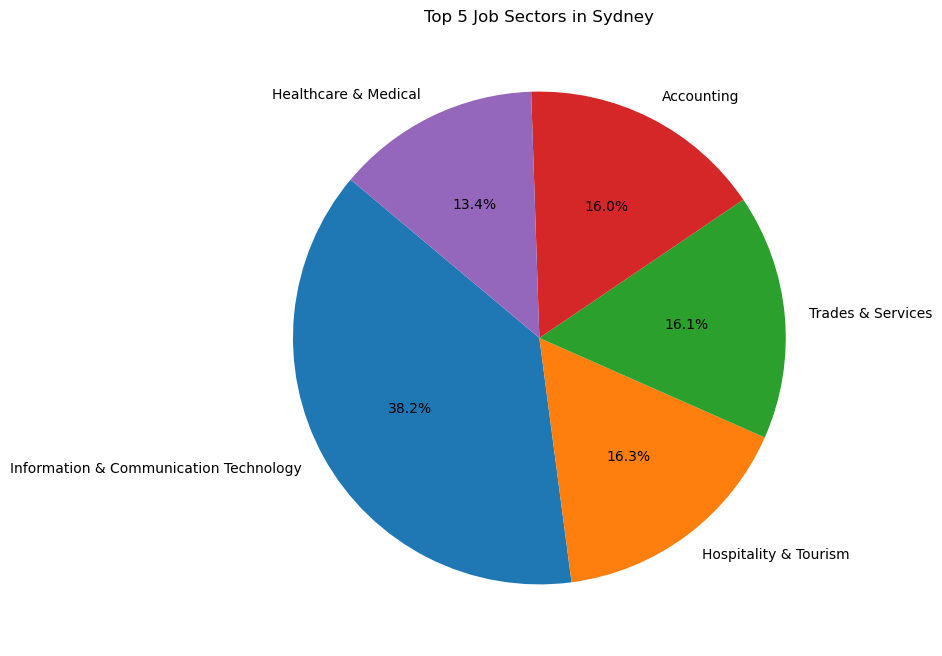

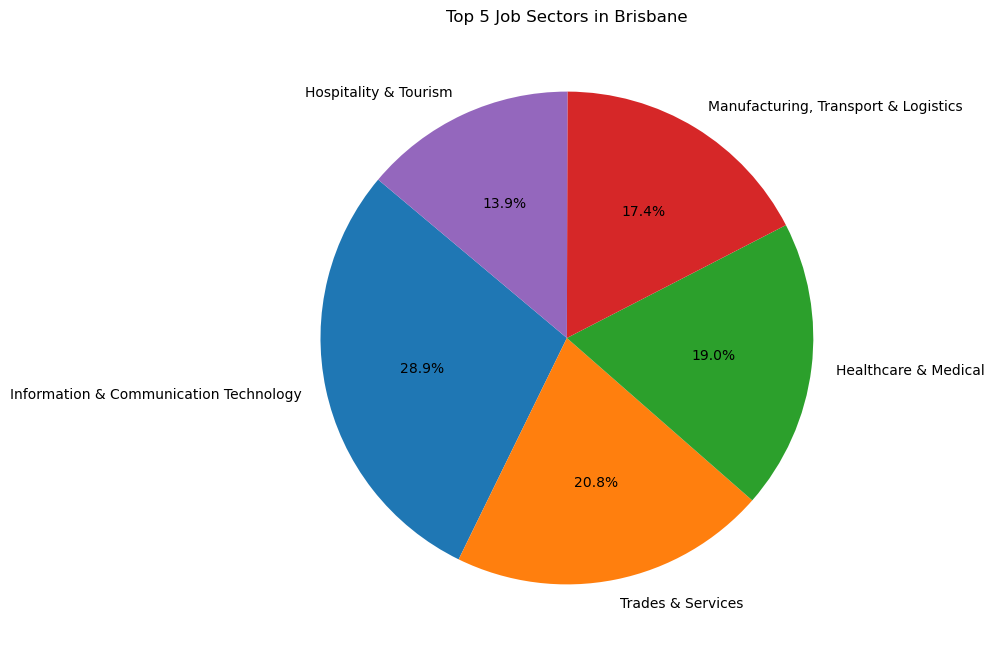

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(sydney_sector_counts, labels=sydney_sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Job Sectors in Sydney')
plt.show()

# Plotting the pie chart for top 5 job sectors in Brisbane
plt.figure(figsize=(8, 8))
plt.pie(brisbane_sector_counts, labels=brisbane_sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Job Sectors in Brisbane')
plt.show()

### 3.1.4 Job salary range with the corresponding number of jobs.

In [32]:
# Calculate salary range for each job in Sydney
sydney_df['SalaryRange'] = sydney_df.apply(lambda row: (row['LowestSalary'], row['HighestSalary']), axis=1)

# Calculate salary range for each job in Brisbane
brisbane_df['SalaryRange'] = brisbane_df.apply(lambda row: (row['LowestSalary'], row['HighestSalary']), axis=1)

# Count the number of jobs in each salary range for Sydney
sydney_salary_counts = sydney_df['SalaryRange'].value_counts()

# Count the number of jobs in each salary range for Brisbane
brisbane_salary_counts = brisbane_df['SalaryRange'].value_counts()

print("Job salary range with corresponding number of jobs in Sydney:")
print(sydney_salary_counts)
print("\nJob salary range with corresponding number of jobs in Brisbane:")
print(brisbane_salary_counts)

# Calculate the total number of jobs in each city
total_jobs_sydney = len(sydney_df)
total_jobs_brisbane = len(brisbane_df)

# Calculate the average salary for each city
average_salary_sydney = sydney_df[['LowestSalary', 'HighestSalary']].mean().mean()
average_salary_brisbane = brisbane_df[['LowestSalary', 'HighestSalary']].mean().mean()

if average_salary_sydney > average_salary_brisbane:
    print("\nSydney has a bigger average salary.")
elif average_salary_sydney < average_salary_brisbane:
    print("\nBrisbane has a bigger average salary.")
else:
    print("\nBoth cities have the same average salary.")

Job salary range with corresponding number of jobs in Sydney:
(0, 30)       11753
(150, 200)     6274
(120, 150)     5706
(100, 120)     5579
(40, 50)       5371
(60, 70)       5288
(70, 80)       5033
(50, 60)       4861
(30, 40)       3969
(80, 100)      3738
(200, 999)     3193
Name: SalaryRange, dtype: int64

Job salary range with corresponding number of jobs in Brisbane:
(0, 30)       4082
(40, 50)      2734
(60, 70)      2033
(50, 60)      1936
(100, 120)    1934
(70, 80)      1800
(150, 200)    1612
(30, 40)      1565
(120, 150)    1462
(80, 100)     1327
(200, 999)     981
Name: SalaryRange, dtype: int64

Sydney has a bigger average salary.


/var/folders/lj/hjx_f2t15pb933d12v5ygp7r0000gn/T/ipykernel_21966/4267749731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sydney_df['SalaryRange'] = sydney_df.apply(lambda row: (row['LowestSalary'], row['HighestSalary']), axis=1)
/var/folders/lj/hjx_f2t15pb933d12v5ygp7r0000gn/T/ipykernel_21966/4267749731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brisbane_df['SalaryRange'] = brisbane_df.apply(lambda row: (row['LowestSalary'], row['HighestSalary']), axis=1)


Sydney has biggest average salary.

### 3.1.5 Top 5 companies in each city and it's sector.

In [33]:
sydney_company_counts = sydney_df['Company'].value_counts().head(5)

# Count the number of jobs for each company in Brisbane
brisbane_company_counts = brisbane_df['Company'].value_counts().head(5)

# Print the top 5 companies in Sydney and their sectors
print("Top 5 companies in Sydney:")
for company, count in sydney_company_counts.items():
    sectors = set(sydney_df[sydney_df['Company'] == company]['Classification'])
    print(f"{company}: {count} jobs ({', '.join(sectors)})")

# Print the top 5 companies in Brisbane and their sectors
print("\nTop 5 companies in Brisbane:")
for company, count in brisbane_company_counts.items():
    sectors = set(brisbane_df[brisbane_df['Company'] == company]['Classification'])
    print(f"{company}: {count} jobs ({', '.join(sectors)})")

Top 5 companies in Sydney:
Jora Local: 1920 jobs (Trades & Services, Retail & Consumer Products, Hospitality & Tourism)
Robert Walters: 607 jobs (Call Centre & Customer Service, Legal, Manufacturing, Transport & Logistics, Engineering, Insurance & Superannuation, CEO & General Management, Banking & Financial Services, Accounting, Consulting & Strategy, Information & Communication Technology, Human Resources & Recruitment, Marketing & Communications, Real Estate & Property, Sales, Administration & Office Support)
Design & Build: 596 jobs (Engineering, Manufacturing, Transport & Logistics, Construction, Trades & Services, Human Resources & Recruitment, Design & Architecture, Marketing & Communications, Real Estate & Property, Sales, Administration & Office Support)
Paxus: 375 jobs (Government & Defence, Banking & Financial Services, Consulting & Strategy, Accounting, Human Resources & Recruitment, Information & Communication Technology, Mining, Resources & Energy, Marketing & Communicati

### Between 2 cities, which do you think it is better for employees?

From this 2 cities, Sydney is a better place for employees because not only offers more Opportunities, but also a better salary range and broader sectors and industries to work in.

## 3.2 Analysis by Time

### 3.2.1 Number of job posts by month

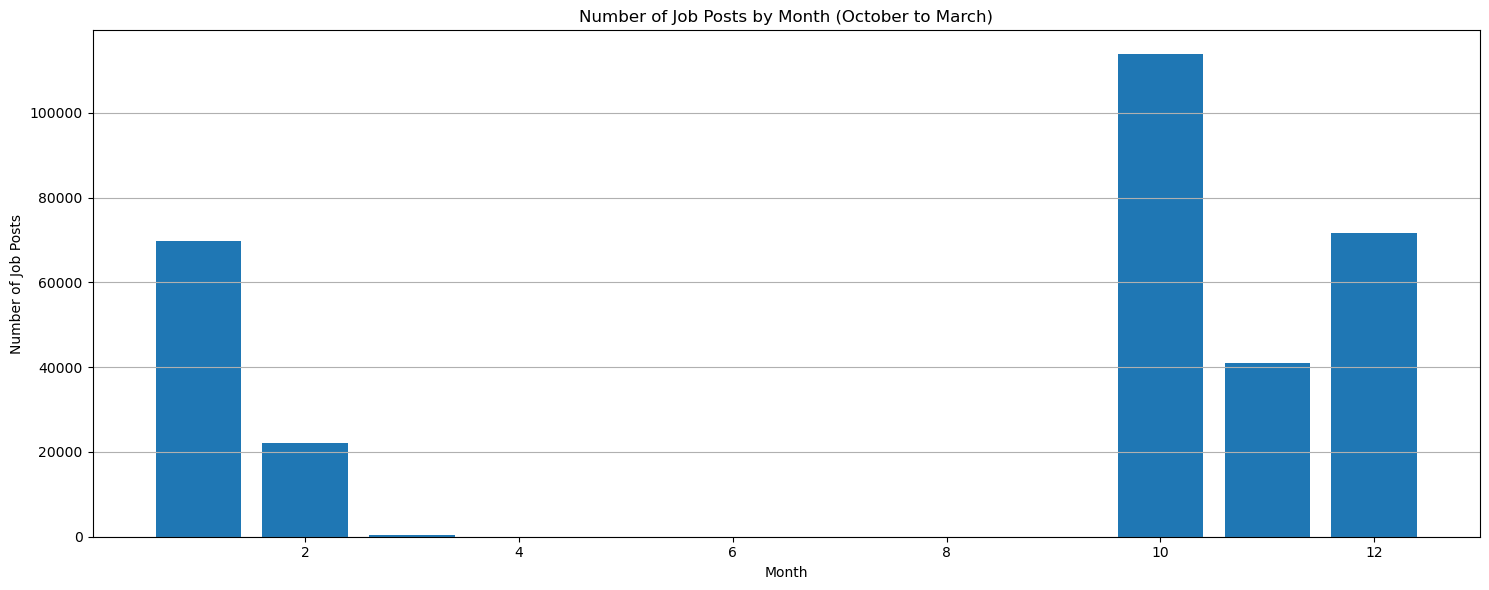

In [70]:

monthly_job_counts = df['Date'].dt.month.value_counts().sort_index()


plt.figure(figsize=(15, 6))
plt.bar(monthly_job_counts.index, monthly_job_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Job Posts')
plt.title('Number of Job Posts by Month (October to March)')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 3.2.2 The number of job posts by day of week.

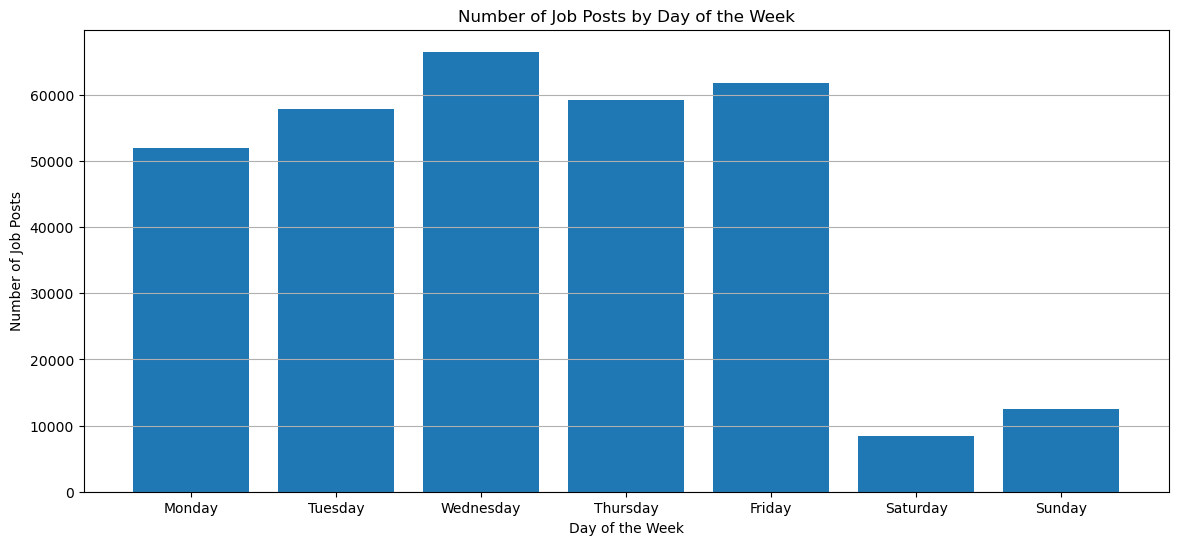

In [72]:
df['DayOfWeek'] = df['Date'].dt.dayofweek


day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = df['DayOfWeek'].map(lambda x: day_names[x])

# Count the number of job posts for each day of the week
daily_job_counts = df['DayOfWeek'].value_counts().reindex(day_names)

# Create a bar chart to visualize the number of job posts by day of the week
plt.figure(figsize=(14, 6))
plt.bar(daily_job_counts.index, daily_job_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Job Posts')
plt.title('Number of Job Posts by Day of the Week')
plt.grid(axis='y')
plt.show()

### 3.2.3 The number of job posts by day of the month.


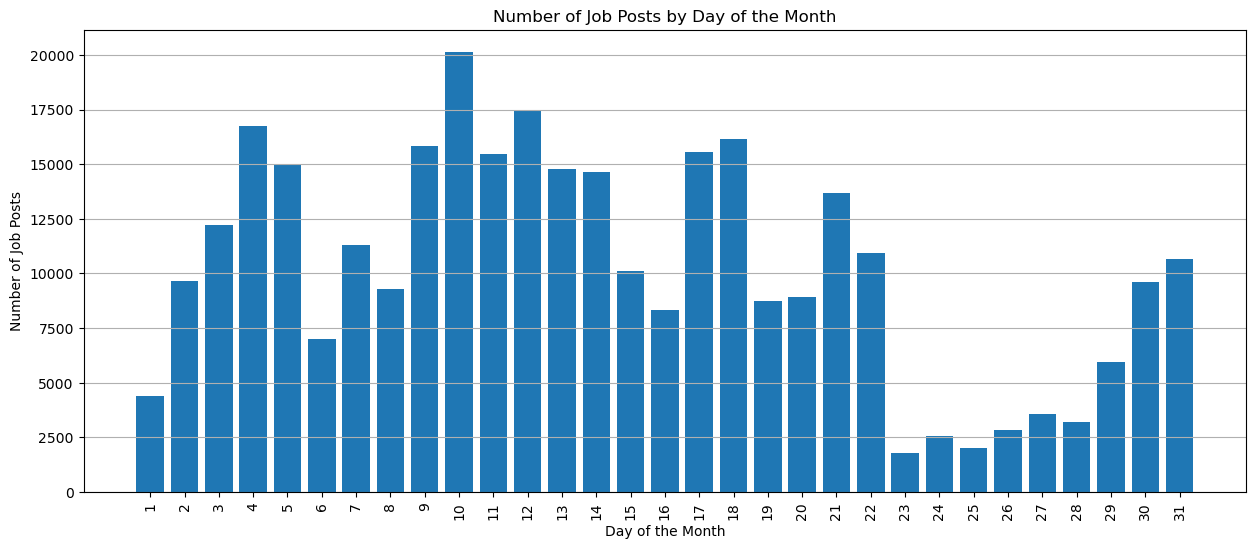

In [73]:
df['DayOfMonth'] = df['Date'].dt.day

# Count the number of job posts for each day of the month
daily_job_counts = df['DayOfMonth'].value_counts().sort_index()

# Create a bar chart to visualize the number of job posts by day of the month
plt.figure(figsize=(15, 6))
plt.bar(daily_job_counts.index, daily_job_counts.values)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Job Posts')
plt.title('Number of Job Posts by Day of the Month')
plt.xticks(range(1, max(daily_job_counts.index) + 1), rotation=90)
plt.grid(axis='y')
plt.show()

### 3.2.4 Trending of the job postings for the big cities

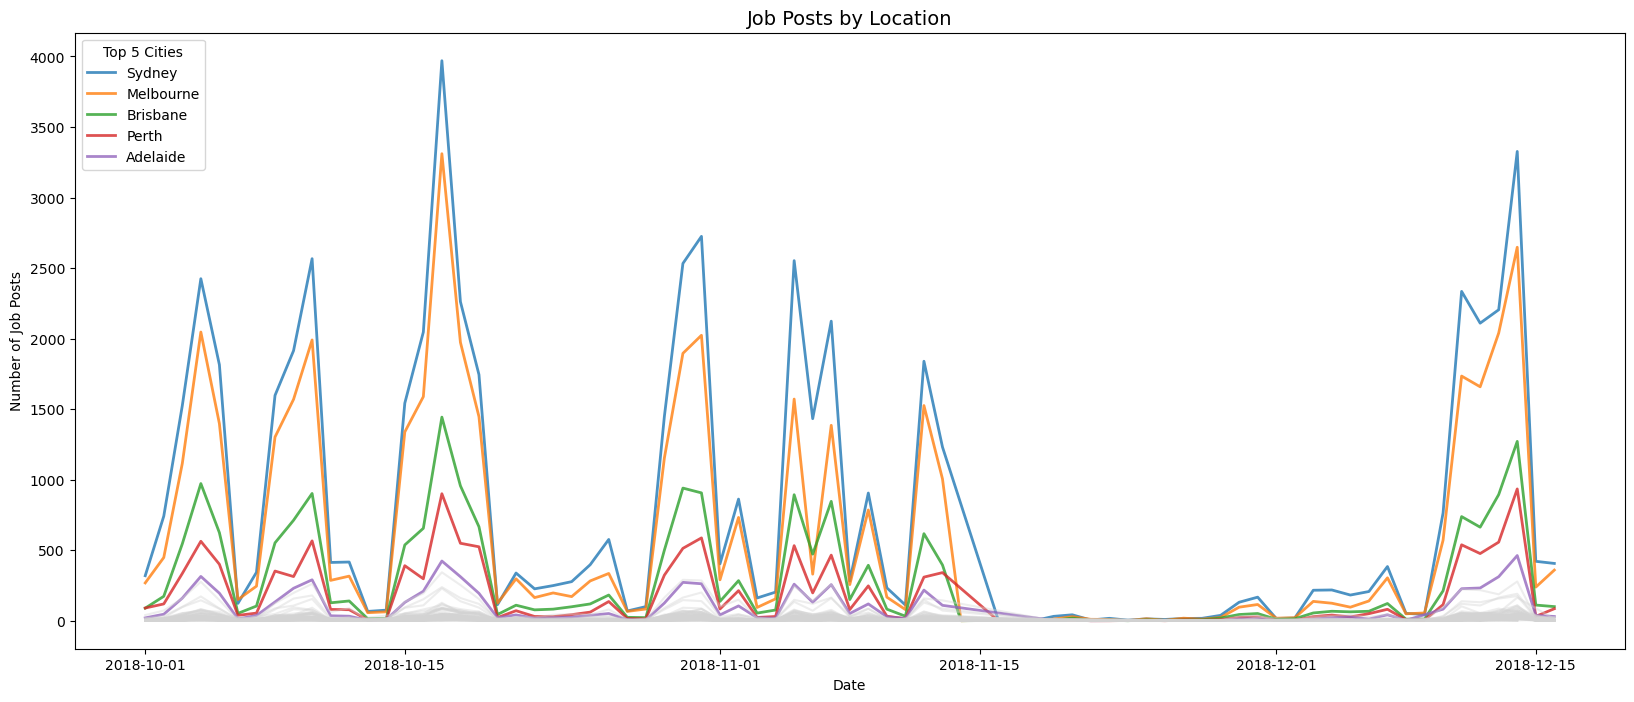

In [37]:
df_location = df[df['Location'].isna()==False]
plt.figure(figsize=(20,8))


df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()


for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)


for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Posts by Location',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

It is possible to conclude that most job posts are made on monday to friday base, as expected, and November is the peak of posts, followed by January. We can observe a consistent daily amount of posts through the month, with a drop from the 23rd to 29th. The dataset it is not very consistent with a big drop from 15-11-2018 to 1-12-2018, which shows a lack of data. 

## 3.3 Forecasting and skill extractions.

### 3.3.1 Moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart.

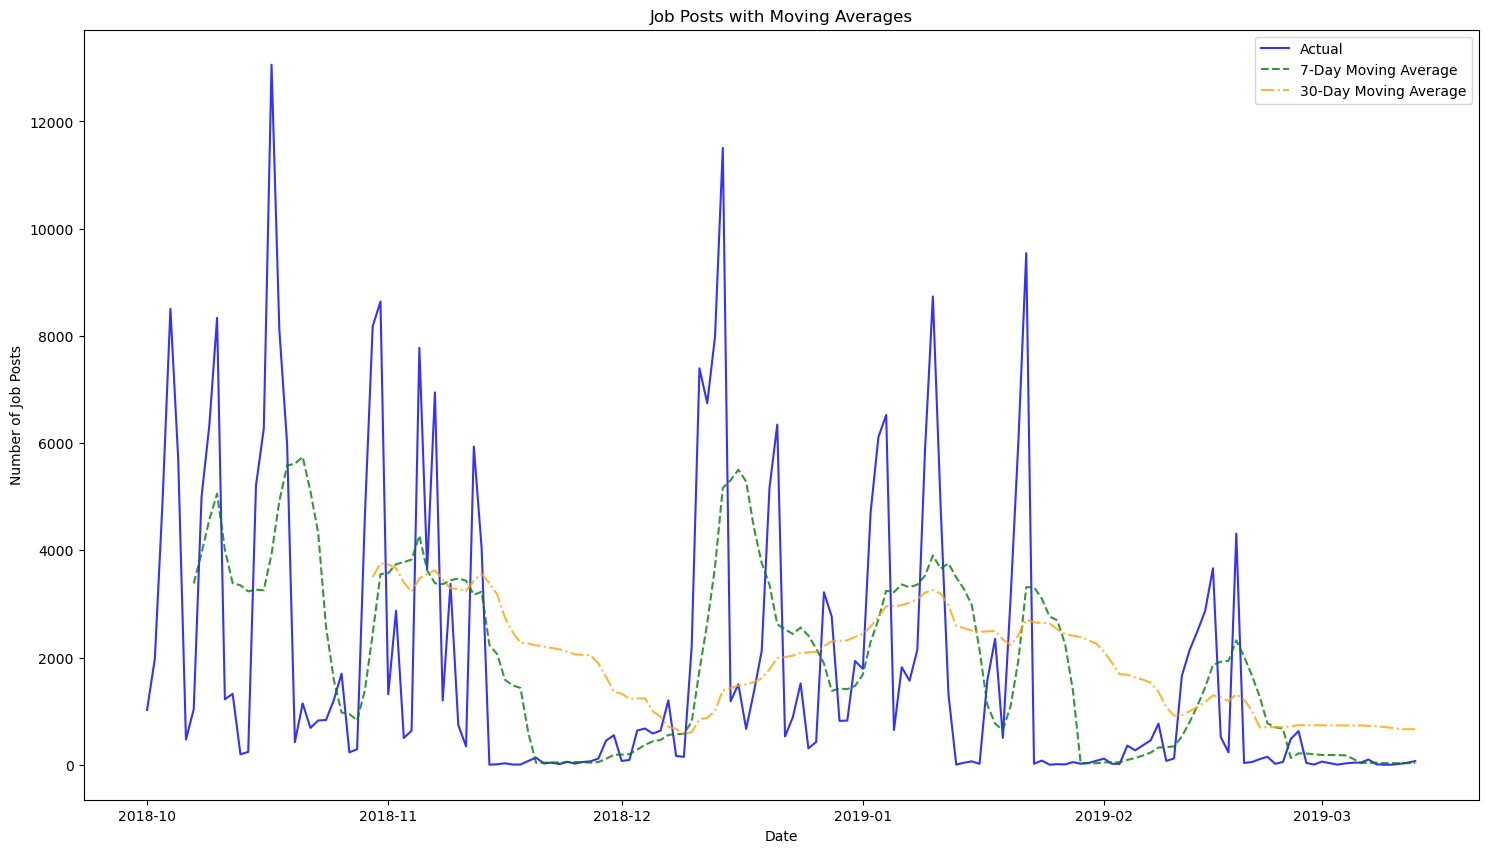

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and count the number of job postings per day
daily_job_counts = df.groupby('Date').size()

# Calculate 7-day and 30-day moving averages
ma_7days = daily_job_counts.rolling(window=7).mean()
ma_30days = daily_job_counts.rolling(window=30).mean()

# Plotting
plt.figure(figsize=(18, 10))

# Plot actual number of job postings per day
plt.plot(daily_job_counts.index, daily_job_counts, label='Actual', color='blue', alpha=0.8)

# Plot 7-day moving average
plt.plot(ma_7days.index, ma_7days, label='7-Day Moving Average', linestyle='--', color='green', alpha=0.8)

# Plot 30-day moving average
plt.plot(ma_30days.index, ma_30days, label='30-Day Moving Average', linestyle='-.', color='orange', alpha=0.8)

plt.legend()
plt.title('Job Posts with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

7 day line offers a better prediction, cause not only is wider, but also follows better the real trend on the dataset. 

### 3.3.2 Choose favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart.

Developers/Programmers

In [79]:
developers_descriptions = df[(df['Classification'] == 'Information & Communication Technology') & (df['SubClassification'] == 'Developers/Programmers')]['FullDescription']
developers_descriptions = developers_descriptions.fillna('')  # Fill NaN values with an empty string

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=50)  # Limit to top 50 words
tfidf_matrix = tfidf_vectorizer.fit_transform(developers_descriptions)

# Step 4: Extract keywords
feature_names = tfidf_vectorizer.get_feature_names_out()  # Get feature names
dense = tfidf_matrix.todense()  # Convert TF-IDF matrix to dense matrix
keywords = []

for i in range(len(developers_descriptions)):
    doc = dense[i].tolist()[0]
    phrase_scores = [pair for pair in zip(range(0, len(doc)), doc) if pair[1] > 0]
    sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
    for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:5]:  # Adjust the number of keywords to extract
        keywords.append(phrase)

# Print extracted keywords
print("Top 50 Keywords for the Developers/Programmers subsector within the ICT sector:")
print(keywords)

Top 50 Keywords for the Developers/Programmers subsector within the ICT sector:
['nbsp', 'team', 'development', 'their', 'you', 'you', 'nbsp', 'are', 'will', 'web', 'nbsp', 'our', 'you', 'opportunity', 'this', 'our', 'nbsp', 'will', 'business', 'we', 'br', 'nbsp', 'will', 'you', 'technology', 'web', 'role', 'their', 'is', 'nbsp', 'nbsp', 'are', 'is', 'web', 'their', 'nbsp', 'their', 'skills', 'you', 'team', 'br', 'we', 'nbsp', 'you', 'our', 'you', 'our', 'will', 'be', 'have', 'we', 'web', 'have', 'our', 'developer', 'nbsp', 'you', 'business', 'href', 'true', 'development', 'an', 'be', 'services', 'please', 'nbsp', 'our', 'is', 'we', 'amp', 'our', 'nbsp', 'technical', 'you', 'be', 'our', 'is', 'development', 'that', 'we', 'design', 'development', 'data', 'solutions', 'is', 'nbsp', 'br', 'you', 'your', 'their', 'br', 'you', 'nbsp', 'design', 'web', 'br', 'we', 'nbsp', 'are', 'new', 'br', 'nbsp', 'you', 'is', 'be', 'br', 'nbsp', 'that', 'you', 'are', 'br', 'or', 'you', 'nbsp', 'team', 'de

![Word Art](wordart.jpeg)

## Part 4 - Discussion

/var/folders/lj/hjx_f2t15pb933d12v5ygp7r0000gn/T/ipykernel_21966/4213673285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brisbane_df['Average_Salary'] = (brisbane_df['LowestSalary'] + brisbane_df['HighestSalary']) / 2


(-1.1221063056501501,
 1.1010526812214356,
 -1.1059791759962962,
 1.1204563512130108)

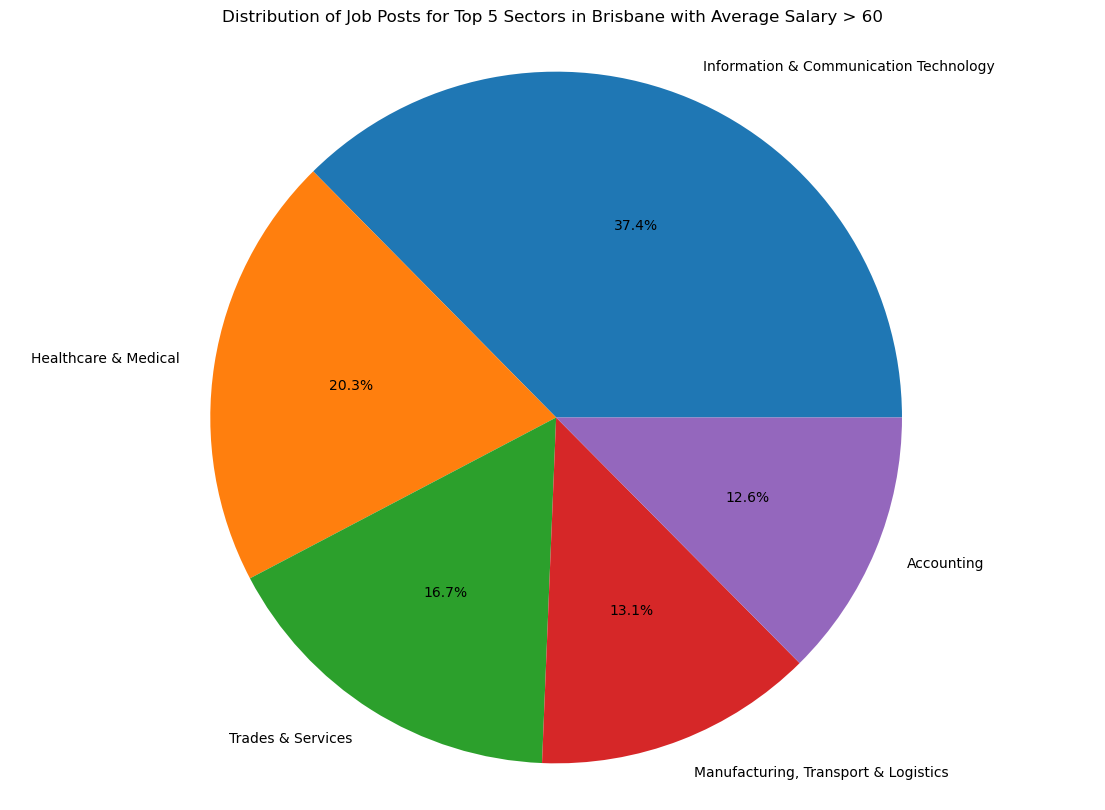

In [90]:
brisbane_df = df[df['Location'] == 'Brisbane']
brisbane_df['Average_Salary'] = (brisbane_df['LowestSalary'] + brisbane_df['HighestSalary']) / 2
# Step 1a: Filter the DataFrame for posts with an average salary over 60
brisbane_df_high_salary = brisbane_df[brisbane_df['Average_Salary'] > 50]


sector_counts = brisbane_df_high_salary['Classification'].value_counts()

top_5_sectors = sector_counts.head(5)

plt.figure(figsize=(14, 10))
plt.pie(top_5_sectors, labels=top_5_sectors.index, autopct='%1.1f%%')
plt.title('Distribution of Job Posts for Top 5 Sectors in Brisbane with Average Salary > 60')
plt.axis('equal')  


Report on University Major Recommendations for Tom

Executive Summary:

As a Senior Business Analyst, I have analyzed the current job market dataset to provide recommendations for Tom, a grade 12 student in Brisbane. Tom is seeking a university major that can guarantee him a job in Queensland with a good income in the future. Based on the dataset, I recommend majors in Information and Communication Technology (ICT), particularly focusing on subsectors such as Developers/Programmers, Business/Systems Analysts, and Programme & Project Management.

Introduction:

Tom, a grade 12 student in Brisbane, aims to pursue a university major that offers promising career prospects in Queensland with a substantial income. To assist Tom in making an informed decision, I have analyzed the current job market dataset to identify majors and related subjects that align with his career aspirations.

Analysis:

Upon analyzing the dataset, it is evident that majors in Information and Communication Technology (ICT) offer promising career opportunities in Queensland. ICT majors not only provide a wide range of job prospects but also offer competitive salaries. Among the subsectors within ICT, Developers/Programmers, Business/Systems Analysts, and Programme & Project Management stand out as top choices.

Recommendations:

Based on the analysis, I recommend Tom to consider pursuing a university major in Information and Communication Technology, with a focus on the following subsectors:

Developers/Programmers: With 4211 job postings, this subsector offers ample opportunities for individuals skilled in software development and programming. Tom can explore majors related to computer science, software engineering, or information technology to excel in this field.

Business/Systems Analysts: This subsector, with 2986 job postings, emphasizes the importance of analyzing business processes and systems to drive organizational success. Majors in business analysis, information systems, or business administration with a focus on technology can equip Tom with the necessary skills for this role.

Programme & Project Management: With 2413 job postings, this subsector highlights the demand for professionals skilled in managing complex projects and programs. Majors in project management, business administration, or engineering management can prepare Tom for a rewarding career in this field.

Conclusion:

In conclusion, pursuing a university major in Information and Communication Technology, particularly focusing on subsectors such as Developers/Programmers, Business/Systems Analysts, and Programme & Project Management, can offer Tom promising career prospects in Queensland. These majors not only align with his career aspirations but also provide opportunities for a lucrative income in the future.

Pie Chart Analysis:

A pie chart depicting the distribution of job postings for the top 5 majors with an average salary over $60 AUD per hour in Brisbane shows that Information and Communication Technology (ICT) dominates with 37.4% of job postings, followed by Healthcare and Medical with 20.3%, and Trades and Services with 16.7%. This further emphasizes the potential of ICT majors in securing promising career opportunities for individuals like Tom.